YOLO V5


In [2]:
#YOLOv5 dependencies
#pip install torch torchvision
#pip install opencv-python
#pip install matplotlib
#pip install pillow
#pip install yolov5  # This installs YOLOv5 from the Ultralytics repository

In [3]:
#Cloning from github
#git clone https://github.com/ultralytics/yolov5.git
#cd yolov5
#pip install -r requirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [2]:
# Load the pre-trained YOLOv5s model (small)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Load YOLOv5 small model

Using cache found in C:\Users\NANDHU/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-12-16 Python-3.12.0 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
#img = cv2.imread("C:\\Users\\NANDHU\\Desktop\\ob.jpg") 
img = cv2.imread("C:\\Users\\NANDHU\\Desktop\\happy-black-man-checks-cell-600nw-2225948601_480.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

C:\Users\NANDHU/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 320x480 1 person, 1 cell phone
Speed: 25.0ms pre-process, 1993.2ms inference, 27.0ms NMS per image at shape (1, 3, 448, 640)


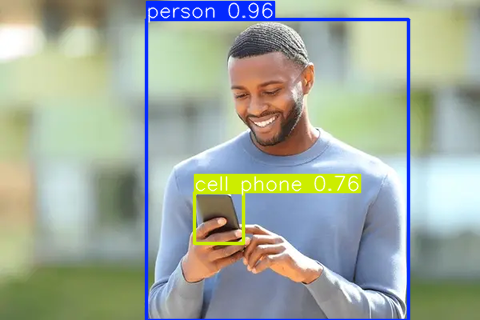

In [4]:
# Perform inference on the image
results = model(img)

# Results (detection bounding boxes, class labels, confidence scores)
results.print()  # Print results to console
results.show()   # Show detected objects in the image


In [7]:
# Extract the results: xywh (x, y, width, height), confidence, and class labels
boxes = results.xywh[0].cpu().numpy() 
confidences = boxes[:, 4]  
class_ids = boxes[:, 5].astype(int)  

# Display the results
for i, box in enumerate(boxes):
    x, y, w, h = box[:4] 
    confidence = confidences[i]
    class_id = class_ids[i]
    
    # Convert box coordinates to integers
    x1, y1, x2, y2 = int(x - w/2), int(y - h/2), int(x + w/2), int(y + h/2)
    
    # Draw bounding box and label on the image
    label = f"{results.names[class_id]} {confidence:.2f}"
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

# Convert back to BGR for OpenCV and display the result
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imshow('YOLOv5 Detection', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
cv2.imwrite('output_image.jpg', img)


True